## Linear Regression
The most basic Machine Learning model. Easy to interpret and very useful. [Here](https://balavenkatesh.medium.com/ten-minutes-to-learn-linear-regression-for-dummies-5469038f4781) is an intermediat read about it.

In [4]:
# !pip install scikit-learn
# !pip install statsmodels
# !pip install scipy

     |████████████████████████████████| 9.5 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 2.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/abhimanyumittal/venv/bin/python -m pip install --upgrade pip' command.


In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [16]:
data = pd.read_csv('regression_data1.csv')
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


The linear model has the formula:
* y = a * X + b
<br>

#### Where:
b is the 'intercept': where the regression line crosses the y axis;<br>
a is the 'coeficient': it's what your model will calculate;<br>
X is a value from a columns.

y = a1*x1 + a2*x2 + a3*x3 + .... + an*xn + b

In [21]:
X

,const,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,1.0,2346,420,446,468,503,14552,15.500000
1,1.0,497,350,364,357,384,11696,3.080000
2,1.0,1229,469,502,507,544,17313,7.500000
3,1.0,325,148,181,171,209,6334,6.700000
4,1.0,768,174,201,220,249,7802,8.785714
...,...,...,...,...,...,...,...,...
4838,1.0,701,297,335,405,468,15258,15.500000
4839,1.0,3357,284,455,343,447,24240,11.857143
4840,1.0,700,322,415,356,446,14360,11.333333
4841,1.0,601,206,225,251,289,9801,13.000000


In [8]:
X = data.drop(['TARGET_D'], axis=1)
y = data['TARGET_D']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     258.2
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:25:05   Log-Likelihood:                -18313.
No. Observations:                4843   AIC:                         3.664e+04
Df Residuals:                    4835   BIC:                         3.669e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2092      0.503     12.346      0.0

In [34]:
X = data.drop(['TARGET_D','HV1','IC1','IC2'], axis=1)
y = data['TARGET_D']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     452.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:31:25   Log-Likelihood:                -18313.
No. Observations:                4843   AIC:                         3.664e+04
Df Residuals:                    4838   BIC:                         3.667e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2053      0.460     13.477      0.0

y = 9.63*HV1 - 0.002*IC1 + 9.86*IC2 + 

In [36]:
# sklearn's LR model

X = data.drop(['TARGET_D'], axis=1) # watch out, rookie mistake, don't use your target to train the model
y = data['TARGET_D'] # what you'll want to predict

lm = LinearRegression() # start the model object
model = lm.fit(X,y) # fit your regression line / train the model
# lm.coef_ # lm.intercept_

In [23]:
# evaluating sklearn's LR model

predictions = lm.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse, good to see if the errors are big, the values returnes are in the unit of the target
print("R2_score:", round(lm.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)

R2_score: 0.27
RMSE: 10.616662758427262


mse = (y1 - y_pred1)**2 + (y2 - y_pred2)**2 + 
rmse = sqrt(mse)

sum(y - y_pred)**2

In [ ]:
# Analyzing results

# hint: to analyse your results, it might be a good idea to add your predictions to your dataframe


<AxesSubplot:xlabel='AVGGIFT', ylabel='TARGET_D'>

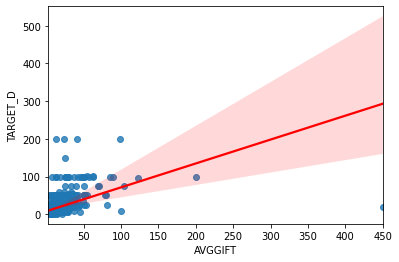

In [38]:
sns.regplot(X['AVGGIFT'], y, line_kws={"color": "red"})

<AxesSubplot:xlabel='TARGET_D'>

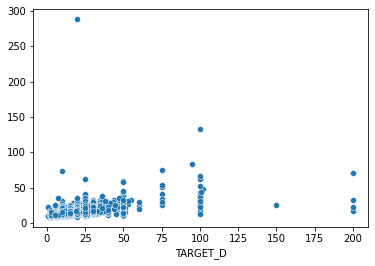

In [39]:
sns.scatterplot(y,predictions)

<AxesSubplot:xlabel='TARGET_D', ylabel='TARGET_D'>

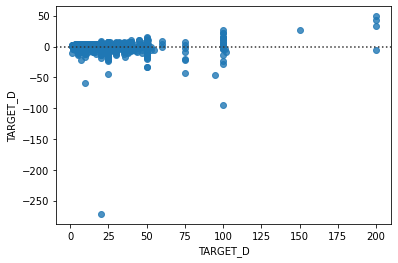

In [13]:
residuals = y - predictions
sns.residplot(y,residuals)

### Assumptions behind [linear regression](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html) 

### Difference between R2 and Adj R2, [link](https://www.analyticsvidhya.com/blog/2020/07/difference-between-r-squared-and-adjusted-r-squared/)